<a href="https://colab.research.google.com/github/wel51x/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
# save diagnosis for later use
save_diagnosis = df['diagnosis']

In [5]:
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.cov()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-7.753706e-03,...,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
texture_mean,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-2.321158e-03,...,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
perimeter_mean,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-4.485888e-02,...,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
area_mean,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-7.034264e-01,...,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
smoothness_mean,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,5.806859e-05,...,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
compactness_mean,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,2.108131e-04,...,0.136643,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
concavity_mean,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,1.895588e-04,...,0.265181,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
concave points_mean,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,4.572905e-05,...,0.155721,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
symmetry_mean,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,9.289106e-05,...,0.024609,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217
fractal_dimension_mean,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,4.984872e-05,...,-0.008657,-0.002225,-0.048671,-0.932024,0.000081,0.000510,0.000510,0.000081,0.000146,0.000098


In [7]:
# from PCA_Office_hours
scaler = StandardScaler()

df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] = scaler.fit_transform(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])


df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
df.cov()


# (X^T)(X) -> column covariance matrix
# (X)(X^T) -> row covariance matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,...,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture_mean,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,...,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter_mean,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,...,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
area_mean,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,...,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
smoothness_mean,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,...,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
compactness_mean,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,...,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
concavity_mean,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,...,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
concave points_mean,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,...,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
symmetry_mean,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,...,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
fractal_dimension_mean,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,...,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [9]:
#df = df.drop('diagnosis', axis=1)
#df.head()
df.shape

(569, 30)

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [10]:
##### Your Code Here #####
# set up PCA reduction structure
pca_reduction = PCA(n_components=2, whiten=False)
# now fit to original data
pca_reduction.fit(df)
# and transform and stick in a df
pca_df = pd.DataFrame(pca_reduction.transform(df))
pca_df.sample(11)


,0,1
444,0.981728,-2.210430
546,-4.237217,0.184272
287,-4.312130,-1.978486
497,-2.553258,-0.763900
89,1.259605,1.015577
15,4.075656,2.977061
517,3.379015,-2.333429
41,-0.093331,2.260752
255,0.460479,0.394166
160,-0.597782,1.785651


In [11]:
pca_df.head()

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [12]:
print("PCA components:\n", pca_reduction.components_)
print("\nPCA mean:", pca_reduction.mean_)
print("\nPCA explained variance: \n", pca_reduction.explained_variance_)

PCA components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]

PCA mean: [-1.37363271e-16  6.86816353e-17 -1.24875700e-16 -2.18532476e-16
  1.74825981e-16  1.99801121e-16  3.74627101e-17 -3.74627101e-17
  1.87313551e-16  4.52674414e-16  2.49751401e-16 -1.03022453e-16
 -3.49651961e-16 -1.31119486e-16  4

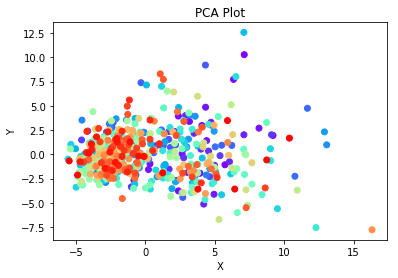

In [13]:
plt.scatter(pca_df[0], pca_df[1], c=matplotlib.cm.rainbow(np.linspace(0, 1, len(pca_df[1]))))
plt.xlabel('X')
plt.ylabel('Y')
plt.title("PCA Plot")
plt.show()

In [14]:
# kind of a mess, maybe 2 clusters?
k_means = KMeans(n_clusters=2)

#now fit to the model
k_means = k_means.fit(pca_df)

# put labels in df
pca_df['cluster_label'] = k_means.labels_
pca_df.head()

,0,1,cluster_label
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


In [0]:
# rename cols to keep Ryan's code happy
pca_df.rename({0: "x", 1: "y"}, axis='columns', inplace=True)

In [0]:
# Ryan's code for plotting
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "oc")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "om")
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y',
               label=key, color=colors[key])
  plt.title("Cluster Plot")
  plt.show()

def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

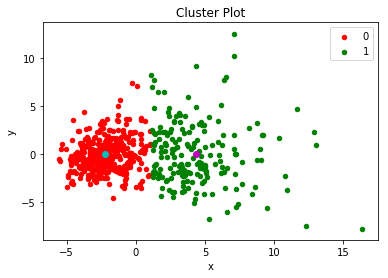

In [17]:
centroids = get_centroids(pca_df, 'cluster_label')
plot_clusters(pca_df, 'cluster_label', centroids)

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [0]:
# Create column with saved diagnosis values from earlier
pca_df['diagnosis'] = save_diagnosis.values
#pca_df.head()

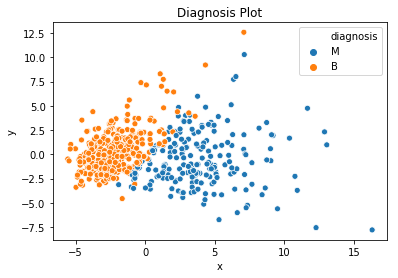

In [19]:
sns.scatterplot(x='x', y='y', data=pca_df, hue='diagnosis')
plt.title('Diagnosis Plot');

**I hope it's right and I hope you're happy.**